In [1]:
#import the libraries 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_path = '/Users/hafsaredouane/Downloads/data_ffnn.txt'

# Charger les données en ignorant la première ligne
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)
x1, x2, y = data[:, 0], data[:, 1], data[:, 2]

# Afficher un aperçu des données pour vérifier leur chargement
print("Exemple de données chargées :")
print(data[:5])


Exemple de données chargées :
[[0.01554639 0.80794092 3.        ]
 [0.00452694 1.42679068 3.        ]
 [1.35810305 1.19395041 3.        ]
 [1.37291148 0.21833735 3.        ]
 [0.2365951  0.28144751 3.        ]]


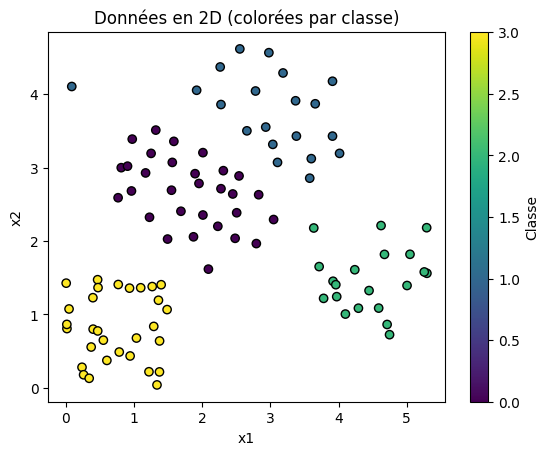

In [3]:
# Étape 2 : Représenter les données en 2D avec des couleurs par classe
plt.scatter(x1, x2, c=y, cmap='viridis', edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Données en 2D (colorées par classe)')
plt.colorbar(label='Classe')
plt.show()


In [4]:
# Étape 3 : Implémentation d'un FFNN avec 3 couches
# Paramètres du réseau
np.random.seed(42)
K = 5  # Nombre de neurones dans la couche cachée, hyperparametre 
input_dim = 2  # Dimension d'entrée (x1, x2)
output_dim = len(np.unique(y))  # Nombre de classes

# Initialisation des poids
V = np.random.randn(input_dim, K) * 0.01  # Poids entrée->cachée
W = np.random.randn(K, output_dim) * 0.01  # Poids cachée->sortie
b1 = np.zeros(K)  # Biais pour la couche cachée
b2 = np.zeros(output_dim)  # Biais pour la couche de sortie


In [7]:
# Fonctions d'activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Propagation avant (Forward Propagation)
def forward_propagation(X):
    # Couche cachée
    Z1 = np.dot(X, V) + b1  # X̅ : Sommes pondérées (avec biais) pour la couche cachée
    F = sigmoid(Z1)         # F : Activations de la couche cachée
    # Couche de sortie
    Z2 = np.dot(F, W) + b2  # F̅ : Sommes pondérées (avec biais) pour la couche de sortie
    G = sigmoid(Z2)         # G : Activations finales (sortie du réseau)
    return Z1, F, Z2, G

# Calcul de l'erreur
def compute_error(Y_true, Y_pred):
    # Erreur au sens de l'entropie croisée
    return -np.sum(Y_true * np.log(Y_pred + 1e-9) + (1 - Y_true) * np.log(1 - Y_pred + 1e-9)) / Y_true.shape[0]

# Préparation des données de sortie (encodage one-hot)
Y = np.eye(output_dim)[y.astype(int)]  # Encodage one-hot de y

# Une itération de la propagation avant
Z1, F, Z2, G = forward_propagation(X)



In [9]:
# Calcul de l'erreur pour la première itération
E = compute_error(Y, G)

# Affichage des résultats intermédiaires
print("Détails des calculs :")
print(f"X :\n{X[:5]}")                # X : Données d'entrée (x1, x2)
print(f"V (Poids entrée -> cachée) :\n{V}")  # V : Poids de la couche cachée
print(f"Z1 (Sommes pondérées couche cachée) :\n{Z1[:5]}")  # Z1 : Sommes pondérées (cachée)
print(f"F (Activations couche cachée) :\n{F[:5]}")  # F : Activations de la couche cachée
print(f"W (Poids couche cachée -> sortie) :\n{W}")  # W : Poids de la couche de sortie
print(f"Z2 (Sommes pondérées couche sortie) :\n{Z2[:5]}")  # Z2 : Sommes pondérées (sortie)
print(f"G (Sorties finales du réseau) :\n{G[:5]}")  # G : Sorties finales (prédictions)
print(f"E (Erreur) : {E:.4f}")        # E : Erreur calculée


Détails des calculs :
X :
[[0.01554639 0.80794092]
 [0.00452694 1.42679068]
 [1.35810305 1.19395041]
 [1.37291148 0.21833735]
 [0.2365951  0.28144751]]
V (Poids entrée -> cachée) :
[[ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153]
 [-0.00234137  0.01579213  0.00767435 -0.00469474  0.0054256 ]]
Z1 (Sommes pondérées couche cachée) :
[[-0.00181447  0.01273761  0.00630111 -0.0035563   0.00434716]
 [-0.00331816  0.0225258   0.01097901 -0.00662947  0.0077306 ]
 [ 0.00395041  0.01697725  0.01795907  0.01507902  0.00329785]
 [ 0.00630824  0.00154976  0.01056779  0.01988481 -0.00203011]
 [ 0.00051623  0.00411753  0.00369233  0.00228209  0.00097303]]
F (Activations couche cachée) :
[[0.49954638 0.50318436 0.50157527 0.49911093 0.50108679]
 [0.49917046 0.50563121 0.50274472 0.49834264 0.50193264]
 [0.5009876  0.50424421 0.50448965 0.50376968 0.50082446]
 [0.50157705 0.50038744 0.50264192 0.50497104 0.49949247]
 [0.50012906 0.50102938 0.50092308 0.50057052 0.50024326]]
W (Poids couche

**Lab**
